In [93]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [94]:
data = pd.read_csv('Iris.csv')

In [95]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [96]:
data.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [97]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [99]:
label_encoder = preprocessing.LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [100]:
x = data.drop('Species',axis=1)  # Features: sepal length, sepal width, petal length, petal width
y = data.Species  # Target labels: species of iris

In [101]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3,random_state=42)

In [114]:
model = svm.SVC(kernel='linear',C=1.0, decision_function_shape='ovr', random_state=42)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [103]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
4      0
32     0
142    2
85     1
86     1
16     0
10     0
Name: Species, dtype: int64

In [104]:
model.score(x_test,y_test)

1.0

In [105]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM model: {accuracy * 100:.2f}%")

Accuracy of SVM model: 100.00%


In [106]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

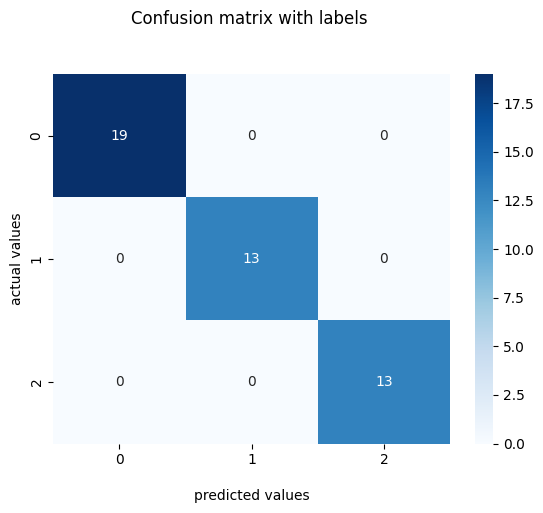

In [118]:
#visualising the confusion matrix
ax = sns.heatmap(cm,annot = True,cmap ='Blues')
ax.set_title('Confusion matrix with labels \n\n');
ax.set_xlabel('\npredicted values');
ax.set_ylabel('actual values');

plt.show()

In [107]:
f1_lr = f1_score(y_test, y_pred, average='weighted')
print(f1_lr)

1.0


In [115]:
accuracy_mlp = accuracy_score(y_test, y_pred, normalize=True)
print(accuracy_mlp)

1.0
